In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from cmcrameri import cm

from utils import rcparams, to_GeV_per_cubic_femtometre, to_nucleons_per_cubic_femtometre
plt.rcParams.update(rcparams)

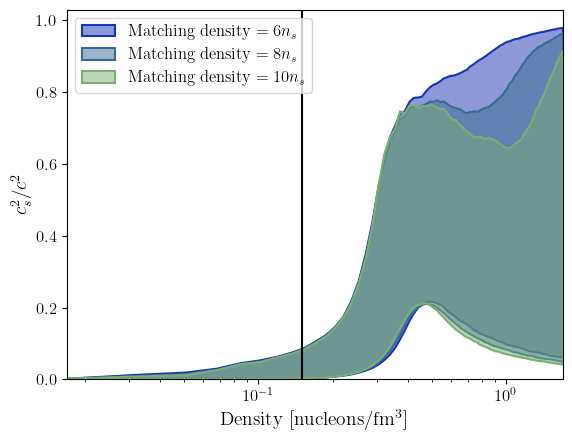

In [5]:
x = to_nucleons_per_cubic_femtometre(np.linspace(2.8e13, 2.8e15, 100))

fig, ax = plt.subplots()
ax.set_xscale('log')

ns_list = [6,8,10]
linestyles = ['-', '-', '-']

for i, ns in enumerate(ns_list):

    quantiles = pd.read_csv(f'quantiles/cs2_of_rho_quantiles_ns{ns:02}_Xmarg.csv')

    ax.fill_between(
        x, 
        quantiles.loc[5,:].values, 
        quantiles.loc[95,:].values, 
        color=list(cm.imola(i/(len(ns_list))))[:3]+[0.5], 
        edgecolor=cm.imola(i/(len(ns_list))),
        linewidth=1.5,
        linestyle=linestyles[i],
        label=f'Matching density $={ns}n_s$'
        )
    
    # ax.fill_between(
    #     x, 
    #     quantiles.loc[5,:].values, 
    #     quantiles.loc[95,:].values, 
    #     color=list(cm.imola(i/(len(ns_list))))[:3]+[0.0], 
    #     edgecolor=cm.imola(i/(len(ns_list))),
    #     linewidth=1.5,
    #     zorder=2
    #     )

ax.axvline(0.15, c='k')

ax.legend(loc='upper left')

ax.set_ylim(0)
ax.set_xlim(x[0], x[-1])

ax.set_xlabel('Density [nucleons/fm$^3$]')
ax.set_ylabel('$c_s^2/c^2$')

fig.savefig('figures/speed_of_sound_vs_density_Xmarg.pdf', bbox_inches='tight')